<a href="https://colab.research.google.com/github/Dinesh9928/DataScience_Playground/blob/main/Chapter_1_Exploratory_Data_Analysis_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Loading and inspecting DATA


In [7]:
df = pd.read_csv('top_anime_dataset.csv')

print(df.head())

                                 Name  Rating  Ranked           Popularity  \
0                   Sousou no Frieren    9.32       1  Sep 2023 - Mar 2024   
1    Fullmetal Alchemist: Brotherhood    9.10       2  Apr 2009 - Jul 2010   
2                One Piece Fan Letter    9.09       3  Oct 2024 - Oct 2024   
3                         Steins;Gate    9.07       4  Apr 2011 - Sep 2011   
4  Shingeki no Kyojin Season 3 Part 2    9.05       5  Apr 2019 - Jul 2019   

             Members Type  
0    974,075 members   TV  
1  3,452,671 members   TV  
2     73,667 members   TV  
3  2,645,303 members   TV  
4  2,379,562 members   TV  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10000 non-null  object 
 1   Rating      10000 non-null  float64
 2   Ranked      10000 non-null  int64  
 3   Popularity  10000 non-null  object 
 4   Members     10000 non-null  object 
 5   Type        10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB
None


In [12]:
print(df.describe())

             Rating       Ranked
count  10000.000000  10000.00000
mean       6.938317   5000.50000
std        0.632787   2886.89568
min        5.970000      1.00000
25%        6.420000   2500.75000
50%        6.860000   5000.50000
75%        7.360000   7500.25000
max        9.320000  10000.00000


# Handling Missing Data

In [14]:
print(df.isnull().sum())

Name          0
Rating        0
Ranked        0
Popularity    0
Members       0
Type          0
dtype: int64


In [15]:
# data['column_name'] = data['column_name'].fillna(data['column_name'].mean())

# Measures of Central Tendency

In [19]:
mean = df['Rating'].mean()
median = df['Rating'].median()
mode = df['Rating'].mode()

print("Mean:", mean)
print("Median:", median)
print("_____")
print("Mode:", mode)

Mean: 6.938317
Median: 6.86
_____
Mode: 0    6.3
Name: Rating, dtype: float64


# Measures of Spread

In [20]:
# Variance and Standard Deviation
variance = df['Rating'].var()
std_dev = df['Rating'].std()

print(f"Variance: {variance}, Standard Deviation: {std_dev}")

Variance: 0.4004191594269545, Standard Deviation: 0.6327868198903597


In [23]:
# Interquartile Range (IQR)
q1 = df['Rating'].quantile(0.25)  # 25th percentile
q3 = df['Rating'].quantile(0.75)  # 75th percentile
iqr = q3 - q1

print(f"Interquartile Rage: {iqr}")

print (f" {df['Rating'].quantile(0.5)}")

Interquartile Rage: 0.9400000000000004
 6.86


In [24]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]

print(outliers)

                                                 Name  Rating  Ranked  \
0                                   Sousou no Frieren    9.32       1   
1                    Fullmetal Alchemist: Brotherhood    9.10       2   
2                                One Piece Fan Letter    9.09       3   
3                                         Steins;Gate    9.07       4   
4                  Shingeki no Kyojin Season 3 Part 2    9.05       5   
5                                            Gintama°    9.05       6   
6                                  Gintama: The Final    9.04       7   
7                                            Gintama'    9.03       8   
8                              Hunter x Hunter (2011)    9.03       9   
9                                 Gintama': Enchousen    9.02      10   
10                               Ginga Eiyuu Densetsu    9.01      11   
11                          Bleach: Sennen Kessen-hen    9.00      12   
12         Kaguya-sama wa Kokurasetai: Ultra Romant

# Correlation

In [28]:
try:
    numeric_df = df.select_dtypes(include=['number'])
    if not numeric_df.empty:
        correlation_matrix = numeric_df.corr()
        print(correlation_matrix)
    else:
        print("No numeric columns found to calculate correlation.")
        #The else statement was not aligned properly, corrected the indentation.

except FileNotFoundError:
    print("Error: 'top_anime_dataset.csv' not found. Please make sure the file exists and the path is correct.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Check the column name.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

          Rating    Ranked
Rating  1.000000 -0.978171
Ranked -0.978171  1.000000


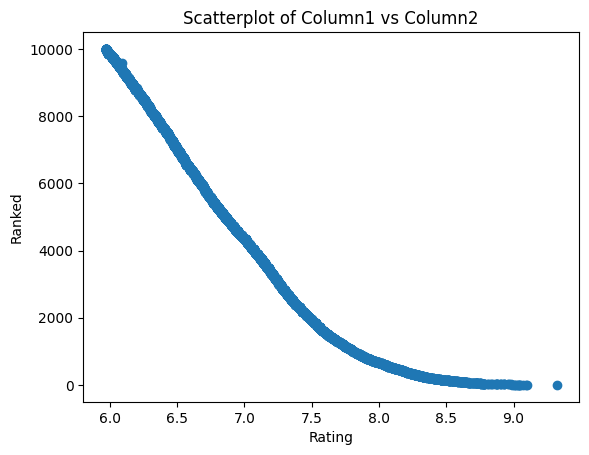

In [29]:
# Scatterplot for two variables
import matplotlib.pyplot as plt

plt.scatter(df['Rating'], df['Ranked'])
plt.title("Scatterplot of Column1 vs Column2")
plt.xlabel("Rating")
plt.ylabel("Ranked")
plt.show()

# Data Visualization

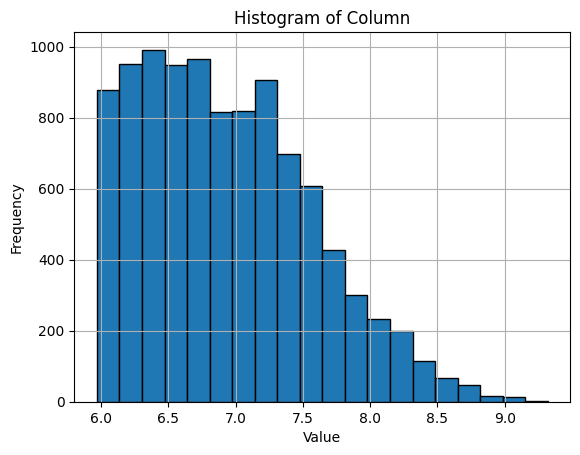

In [30]:
df['Rating'].hist(bins=20, edgecolor='black')
plt.title("Histogram of Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Boxplot

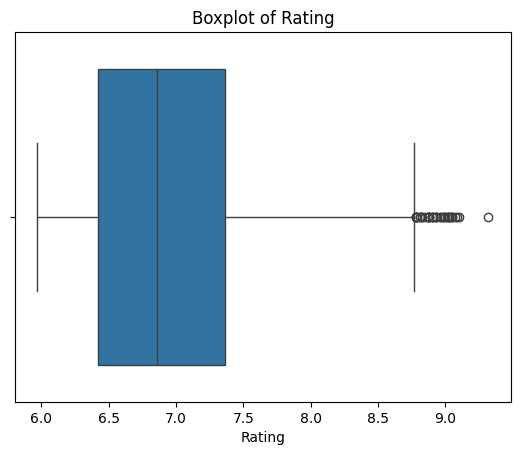

In [34]:
import seaborn as sns

sns.boxplot(x=df['Rating'])
plt.title("Boxplot of Rating")
plt.show()


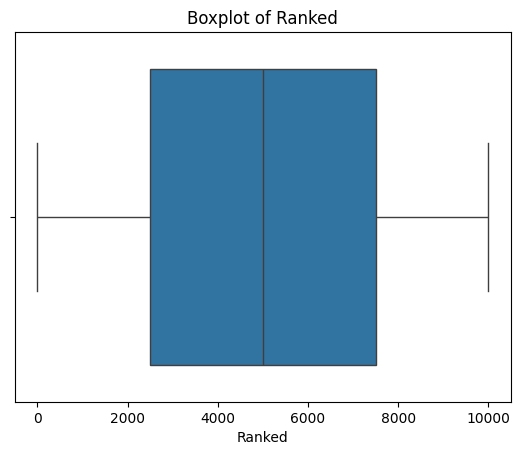

In [35]:
sns.boxplot(x=df['Ranked'])
plt.title("Boxplot of Ranked")
plt.show()

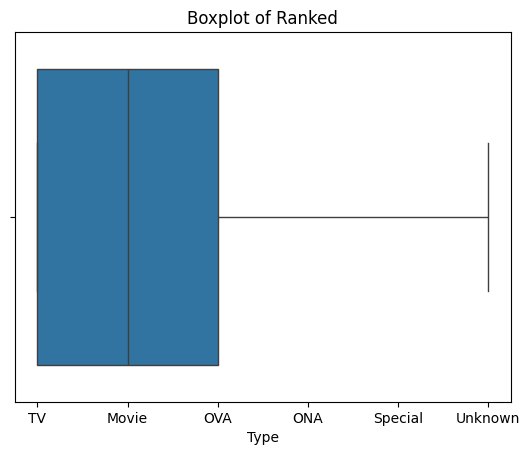

In [46]:
sns.boxplot(x=df['Type'])
plt.title("Boxplot of Ranked")
plt.show()

# Bar Chart

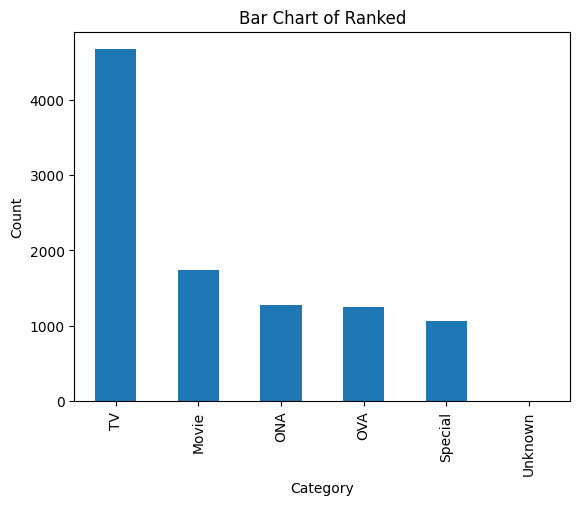

In [45]:
df['Type'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Ranked")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


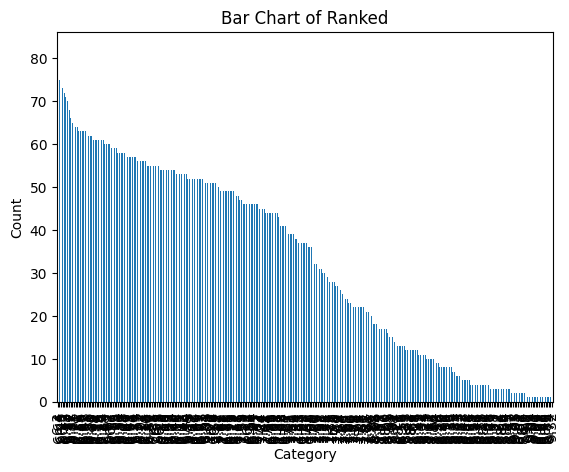

In [37]:
df['Rating'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Ranked")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Handling Skewness

In [38]:
from scipy.stats import skew, kurtosis

# Skewness
skewness = skew(df['Rating'].dropna())
# Kurtosis
kurt = kurtosis(df['Rating'].dropna())

print(f"Skewness: {skewness}, Kurtosis: {kurt}")


Skewness: 0.5669435199905574, Kurtosis: -0.2634030032688277


# Sampling

In [41]:
# Random sampling
sampled_data = df.sample(frac=0.1, random_state=42)  # 10% sample
print(sampled_data.head())



                                                Name  Rating  Ranked  \
6252                   Hana no Mahoutsukai Mary Bell    6.63    6253   
4684                            Starmyu in Halloween    6.92    4685   
1731                                  Aikatsu! Movie    7.55    1732   
4742  Shikabane Hime: Kuro – Soredemo, Hito to Shite    6.91    4743   
4521                            Ougon Yuusha Goldran    6.96    4522   

               Popularity         Members     Type  
6252  Feb 1992 - Jan 1993   3,749 members       TV  
4684  Oct 2018 - Oct 2018   3,779 members      OVA  
1731  Dec 2014 - Dec 2014   8,730 members    Movie  
4742  Aug 2009 - Aug 2009  16,195 members  Special  
4521  Feb 1995 - Jan 1996   3,449 members       TV  


#  Pairplot for Relationships

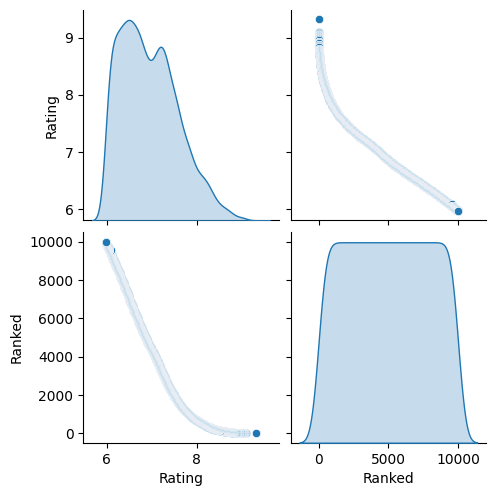

In [44]:
sns.pairplot(df, vars=['Rating', 'Ranked'], diag_kind='kde')
plt.show()